In [2]:
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn.model_selection import train_test_split
mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']
X = X.astype(np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)
# X_train, X_val, y_train, y_val = train_test_split(X_tr_val, y_tr_val, test_size=15000)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
rf_clf = RandomForestClassifier(max_leaf_nodes=7)
pca = PCA(n_components=0.95)

In [11]:
from time import time

def time_model(model):
    beg = time()
    model.fit(X_train, y_train)
    end = time()
    print("{:.2f} seconds".format(end-beg))
    score = model.score(X_test, y_test)
    print("{:.0%} accurate".format(score))

In [13]:
from sklearn.pipeline import Pipeline

pipe_simple = Pipeline([
    ('forest', rf_clf)
])

pipe_decom = Pipeline([
    ('pca', pca),
    ('forest', rf_clf)
])

In [14]:
time_model(pipe_simple)

2.84 seconds
63% accurate


In [15]:
time_model(pipe_decom)

14.29 seconds
63% accurate


PCA made the run much slower and it didn't help the accuracy much at all.

In [42]:
from sklearn.manifold import MDS, LocallyLinearEmbedding as LLE, TSNE

pipe_double_decom = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('tsne', TSNE(n_components=2))
])

decom_models = [PCA(n_components=2),
                MDS(n_components=2),
                LLE(n_neighbors=7, n_components=2),
                TSNE(n_components=2),
                pipe_double_decom]

In [43]:
import matplotlib.pyplot as plt

def plot_data(X, y, decom_name):
    plt.figure(figsize=(8, 5))
    plt.title(decom_name)
    classes = np.unique(y)
    n_classes = len(classes)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.colorbar()
    plt.show()

reducing data for PCA...
plotting...


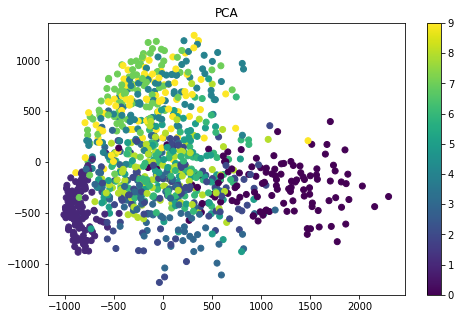

reducing data for MDS...
plotting...


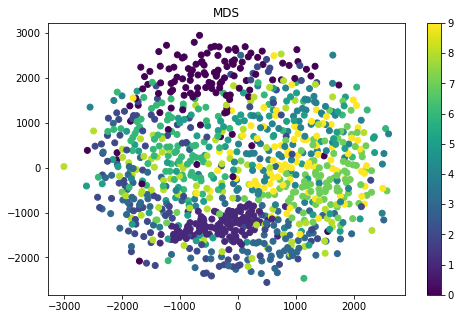

reducing data for LocallyLinearEmbedding...
plotting...


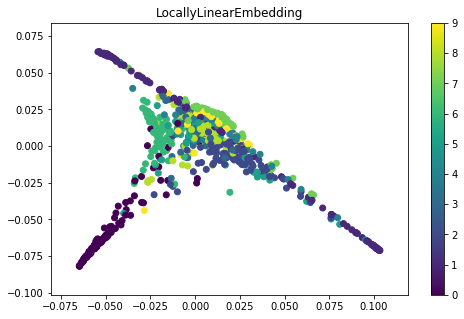

reducing data for TSNE...
plotting...


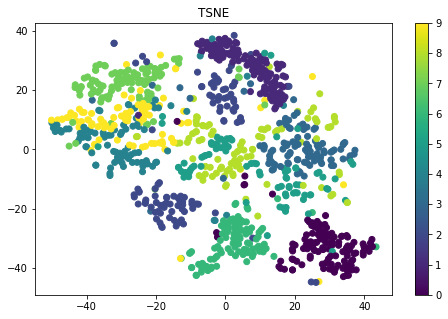

reducing data for Pipeline...
plotting...


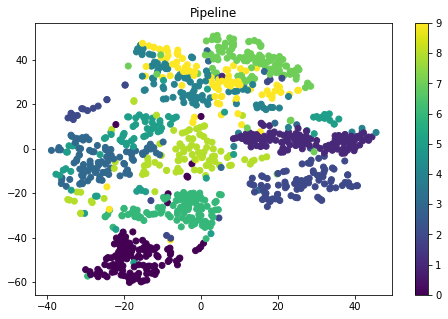

In [44]:
X_toss, X_plot, y_toss, y_plot = train_test_split(X, y, test_size=1000)
for decom in decom_models:
    name = type(decom).__name__
    print("reducing data for {}...".format(name))
    X_decom = decom.fit_transform(X_plot)
    print("plotting...")
    plot_data(X_decom, y_plot, name)